In [1]:
import sys 
sys.path.append('..')

import torch
import torch.nn as nn
from losses import *
import time
import matplotlib.pyplot as plt

device="cuda"

## 1 Channel

Computing 2x2
Computing 4x4
Computing 8x8
Computing 16x16
Computing 32x32


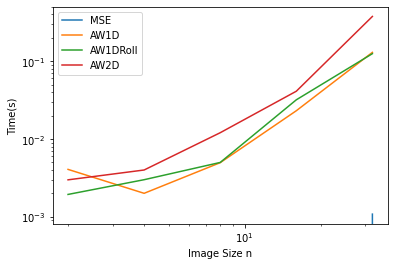

In [3]:
n_all = [2**i for i in range(1, 6)]
mse,  times_mse  = nn.MSELoss(), []
aw1D, times_aw1D = AWLoss1D(), []
aw1Droll, times_aw1Droll = AWLoss1DRoll(), []
aw2D, times_aw2D = AWLoss2D(), []

for n in n_all:
    print("Computing {}x{}".format(n, n))
    X = torch.rand(1, 1, n, n) + torch.diag(10*torch.ones(n))
    X_rec = torch.rand(1, 1, n, n) + torch.diag(10*torch.ones(n))

    X = X.to(device)
    X_rec = X_rec.to(device)
    
    start = time.time()
    _ = mse(X, X_rec)
    times_mse.append(time.time() - start)
    
    start = time.time()
    _ = aw1D(X, X_rec)
    times_aw1D.append(time.time() - start)
    
    start = time.time()
    _ = aw1Droll(X, X_rec)
    times_aw1Droll.append(time.time() - start)
    
    
    start = time.time()
    _ = aw2D(X, X_rec)
    times_aw2D.append(time.time() - start)

    del X
    del X_rec
    torch.cuda.empty_cache()

plt.loglog(n_all, times_mse, label="MSE")
plt.loglog(n_all, times_aw1D, label="AW1D")
plt.loglog(n_all, times_aw1Droll, label="AW1DRoll")
plt.loglog(n_all, times_aw2D, label="AW2D")
plt.xlabel("Image Size n")
plt.ylabel("Time(s)")
plt.legend(loc="best")
plt.show()

## 3 Channels

Computing 2x2
Computing 4x4
Computing 8x8
Computing 16x16
Computing 32x32
Computing 64x64


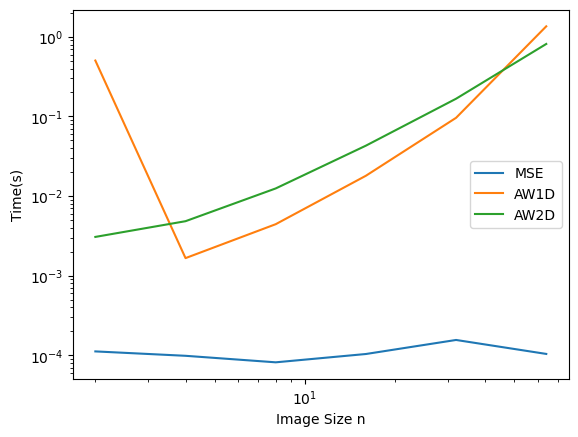

In [3]:
n_all = [2**i for i in range(1, 7)]
mse,  times_mse  = nn.MSELoss(), []
aw1D, times_aw1D = AWILoss1D(), []
aw2D, times_aw2D = AWILoss2D(), []

for n in n_all:
    print("Computing {}x{}".format(n, n))
    X = torch.rand(3, n, n) + torch.diag(10*torch.ones(n))
    X_rec = torch.rand(3, n, n) + torch.diag(10*torch.ones(n))

    X = X.unsqueeze(0).to(device)
    X_rec = X_rec.unsqueeze(0).to(device)
    
    start = time.time()
    _ = mse(X, X_rec)
    times_mse.append(time.time() - start)
    
    start = time.time()
    _ = aw1D(X, X_rec)
    times_aw1D.append(time.time() - start)
    
    start = time.time()
    _ = aw2D(X, X_rec)
    times_aw2D.append(time.time() - start)
    # print(time.time() - start)

    del X
    del X_rec
    torch.cuda.empty_cache()

plt.loglog(n_all, times_mse, label="MSE")
plt.loglog(n_all, times_aw1D, label="AW1D")
plt.loglog(n_all, times_aw2D, label="AW2D")
plt.xlabel("Image Size n")
plt.ylabel("Time(s)")
plt.legend(loc="best")
plt.show()